# Does the vehicle type affect the chances of rollover and injury?📝

<!-- Are SUV rollover rates declining? -->

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

I think the bigger the vehicle, the safer it is on the road. However, bigger vehicle like SUVs and trucks are believed to be more likely to rollover than passenger cars. But that may not necessarily mean that the accidents will always be fatal. Some data even says that the rollover rates for SUVs are declining (article: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3217479/). 

   

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

Although certain road and traffic conditions increase the likelihood of fatal accidents, does it matter what type of vehicle are we driving? Are there more rollover chances for SUVs than cars?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

A hypothesized answer will be - SUVs are more likely to rollover due to their design (they are generally taller and narrower), but the rates are declining and the accidents are not always fatal.   

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

1. https://www.iihs.org/topics/fatality-statistics/detail/passenger-vehicle-occupants?_gl=1*1t3lna3*_ga*YW1wLU5uWExTOC00UnpJamxTZ2M5RlNOUEE.#fn1ref1 

This webpage has multiple data tables on death and rollover rates by vehicle type. 

2. https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/809438 

This documnent has data tables that show the number of rollovers by vehicle type.

3. https://www.kaggle.com/datasets/usdot/nhtsa-traffic-fatalities?select=vehicle_2016 

This dataset is from Kaggle - it has traffic fatality records.  



## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

These sources have data about crashes, deaths and rollovers. These can be merged together - for example, total crashes and rollover by vehicle type will show what type of vehicle is most likely to rollover and if the SUV rollover rates are really declining. 


In [2]:
# Start your code here 
import pandas as pd
import numpy as np
import opendatasets as od 
from urllib.request import urlretrieve
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import PyPDF2 
import camelot
import pandas as pd
import tabula

from IPython.display import IFrame
from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

- #### <b>Dataframe (occupants_df) - passenger vehicle <span style='background:green'>occupant</span> deaths by vehicle type, 1975-2020</b>

In [3]:
url = 'https://iihs.org/topics/fatality-statistics/detail/passenger-vehicle-occupants?_gl=1'             
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
tables = soup.find_all('table')
occupants_df = pd.read_html(str(tables[4]), header=[2])[0]
occupants_df.columns = ['Year', 'Cars', '%', 'Pickup', '%', 'SUV', '%', 'Total', '%']
del occupants_df["%"]
del occupants_df["Total"]
occupants_df.head()

,Year,Cars,Pickup,SUV
0,1975,25715,3674,455
1,1976,26163,4225,577
2,1977,26698,4512,729
3,1978,27898,5103,852
4,1979,27518,5423,945


- #### <b>Bar chart - Passenger vehicle <span style='background:green'>occupant</span> deaths by vehicle type, 1975-2020</b>

In [42]:
fig = px.bar(occupants_df, x='Year', y=occupants_df.drop(columns=['Year']).columns)
fig.update_layout(title='Passenger vehicle occupant deaths by vehicle type, 1975-2020')
fig.show()

- #### <b>Line chart - Passenger vehicle <span style='background:green'>occupant</span> deaths by vehicle type, 1975-2020</b>

In [41]:
fig = px.line(occupants_df, x='Year', y=occupants_df.drop(columns=['Year']).columns)
fig.update_layout(title='Passenger vehicle occupant deaths by vehicle type, 1975-2020')
fig.show()

- #### <b>Dataframe (drivers_df) - Passenger vehicle <span style='background:green'>driver</span> deaths by vehicle type, 1975-2020</b>

In [6]:
url = 'https://iihs.org/topics/fatality-statistics/detail/passenger-vehicle-occupants?_gl=1'             
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
tables = soup.find_all('table')
drivers_df = pd.read_html(str(tables[5]), header=[2])[0]
drivers_df.columns = ['Year', 'Cars Drivers', '%', 'Pickup Drivers', '%', 'SUV Drivers', '%', 'Total', '%']
del drivers_df["%"]
del drivers_df["Total"]
drivers_df.head()

,Year,Cars Drivers,Pickup Drivers,SUV Drivers
0,1975,16141,2481,270
1,1976,16385,2890,347
2,1977,16903,3076,434
3,1978,18047,3535,519
4,1979,18064,3734,596


- #### <b>Bar chart - Passenger vehicle <span style='background:green'>driver</span> deaths by vehicle type, 1975-2020</b>

In [40]:
fig = px.bar(drivers_df, x='Year', y=drivers_df.drop(columns=['Year']).columns)
fig.update_layout(title='Passenger vehicle driver deaths by vehicle type, 1975-2020')
fig.show()

- #### <b>Line chart - Passenger vehicle <span style='background:green'>driver</span> deaths by vehicle type, 1975-2020</b>

In [39]:
fig = px.line(drivers_df, x='Year', y=drivers_df.drop(columns=['Year']).columns)
fig.update_layout(title='Passenger vehicle driver deaths by vehicle type, 1975-2020')
fig.show()

- #### <b>Dataframe (rollover_df) - Passenger vehicles involved in fatal crashes by year and vehicle body type </b>

In [9]:
rollover_df = pd.read_csv(r'data\Passenger Vehicles Involved in Rollover Crashes (percent value).csv')
display(rollover_df)

,Year,Passenger Cars,SUVs,Pickup Trucks,Vans
0,1991,16,36,27,19
1,1995,15,37,25,18
2,2000,15,36,24,19


- #### <b>Bar chart - Passenger vehicles involved in fatal crashes by year and vehicle body type </b>

In [38]:
fig = px.bar(rollover_df, x=rollover_df['Year'], y=rollover_df.drop(columns=['Year']).columns, barmode = 'group')
fig.update_layout(title='Passenger vehicles involved in fatal crashes by year and body type')
fig.show()

- #### <b>Dataframe (drivers_df2) - Driver deaths per million registered passenger vehicles 1-3 years old by vehicle size, 2020</b>

In [11]:
url = 'https://iihs.org/topics/fatality-statistics/detail/passenger-vehicle-occupants?_gl=1'             
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
tables = soup.find_all('table')
drivers_df2 = pd.read_html(str(tables[14]), header=[2])[0]
drivers_df2.drop(index=drivers_df2.index[-1],axis=0,inplace=True)
drivers_df2.columns = ['Body Type', 'Size','Registered Vehicles', 'Deaths', 'Rate']

display(drivers_df2)

,Body Type,Size,Registered Vehicles,Deaths,Rate
0,Cars,Small,6445516,370,57
1,Cars,Midsize,7849366,338,43
2,Cars,Large,1847053,140,76
3,Cars,Very large,1596440,35,22
4,Cars,All cars,18486493,977,53
5,Pickups,Small,1614198,44,27
6,Pickups,Large,5133336,186,36
7,Pickups,Very large,1731353,57,33
8,Pickups,All pickups,8478887,297,35
9,SUVs,Small,9882699,325,33


- #### <b>Heatmap - Fatality Rates for Passenger Vehicle Occupants </b>

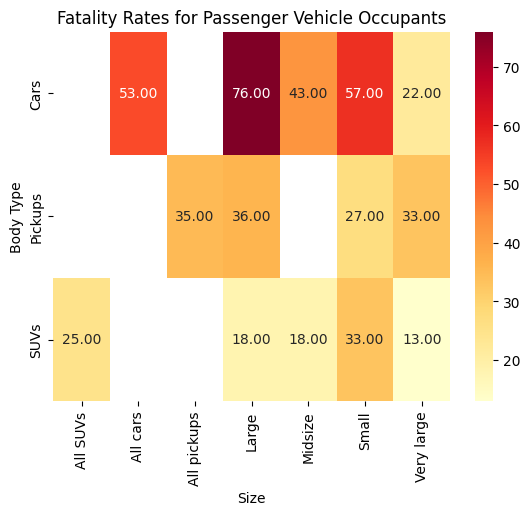

In [12]:
pivot_df = drivers_df2.pivot(index='Body Type', columns='Size', values='Rate')
sns.heatmap(pivot_df, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Fatality Rates for Passenger Vehicle Occupants')
plt.xlabel('Size')
plt.ylabel('Body Type')
plt.show()

- #### <b>Dataframe (drivers_df3) - <span style='background:green'>Driver</span> deaths per million registered passenger vehicles 1-3 years old, 1978-2020</b>

In [13]:
url = 'https://iihs.org/topics/fatality-statistics/detail/passenger-vehicle-occupants?_gl=1'             
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
tables = soup.find_all('table')
drivers_df3 = pd.read_html(str(tables[13]), header=[2])[0]

drivers_df3.columns = ['Year', 'Cars', 'Pickup', 'SUVs', '1', '2', '3', '4', '5']
del drivers_df3["1"]
del drivers_df3["2"]
del drivers_df3["3"]
del drivers_df3["4"]
del drivers_df3["5"]

drivers_df3.head()

,Year,Cars,Pickup,SUVs
0,1978,155,237,273
1,1979,165,246,271
2,1980,167,221,287
3,1981,177,216,237
4,1982,155,188,229


- #### <b>Stacked area chart - <span style='background:green'>Driver</span> deaths per million registered passenger vehicles 1-3 years old, 1978-2020</b>

In [37]:
fig = px.area(drivers_df3, x=drivers_df3['Year'], y=drivers_df3.drop(columns=['Year']).columns)
fig.update_layout(title='Driver deaths per million registered passenger vehicles 1-3 years old, 1978-2020')
fig.show()

- #### <b>Dataframe (occupants_df2) - <span style='background:green'>All occupants</span> deaths per million registered passenger vehicles 1-3 years old, 1978-2020</b>

In [15]:
url = 'https://iihs.org/topics/fatality-statistics/detail/passenger-vehicle-occupants?_gl=1'             
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
tables = soup.find_all('table')
occupants_df2 = pd.read_html(str(tables[13]), header=[2])[0]

occupants_df2.columns = ['Year', '1', '2', '3', '4', 'Car', 'Pickups', 'SUVs', '5']
del occupants_df2["1"]
del occupants_df2["2"]
del occupants_df2["3"]
del occupants_df2["4"]
del occupants_df2["5"]

occupants_df2.head()

,Year,Car,Pickups,SUVs
0,1978,235,346,438
1,1979,244,350,425
2,1980,248,316,494
3,1981,259,296,389
4,1982,231,263,392


- #### <b>Stacked area chart - <span style='background:green'>All occupants</span> deaths per million registered passenger vehicles 1-3 years old, 1978-2020</b>

In [36]:
fig = px.area(occupants_df2, x=occupants_df2['Year'], y=occupants_df2.drop(columns=['Year']).columns)
fig.update_layout(title='Occupants deaths per million registered passenger vehicles 1-3 years old, 1978-2020')
fig.show()

- #### <b>Dataframe (crash_df) - Vehicle Involvement in Fatal Crashes - Rate per 100,000 Registered Vehicles By Year and Body Type of Vehicle. Here 'light trucks' includes SUVs, pickups, and vans </b>

In [17]:
crash_df = pd.read_csv(r'data\Vehicle Involvement in Fatal Crashes - Rate per 100,000 Registered Vehicles By Year and Body Type of Vehicle .csv')
crash_df = crash_df.drop(index=0)
crash_df.columns = ['Year', 'Registered (pass cars)', 'Involved (pass cars)', 'Rate', 
                         'Registered (light trucks)', 'Involved (light trucks)', 'Rate']

#changed data types
crash_df['Registered (pass cars)'] = crash_df['Registered (pass cars)'].replace(',', '', regex=True).astype(float)
crash_df['Involved (pass cars)'] = crash_df['Involved (pass cars)'].replace(',', '', regex=True).astype(float)
crash_df['Registered (light trucks)'] = crash_df['Registered (light trucks)'].replace(',', '', regex=True).astype(float)
crash_df['Involved (light trucks)'] = crash_df['Involved (light trucks)'].replace(',', '', regex=True).astype(float)

crash_df.head()

,Year,Registered (pass cars),Involved (pass cars),Rate,Registered (light trucks),Involved (light trucks),Rate
1,1991.0,123327336.0,31291.0,25.37,52062064.0,14832.0,28.49
2,1992.0,120346747.0,29817.0,24.18,53836046.0,14648.0,27.21
3,1993.0,121055398.0,30233.0,24.97,56573835.0,15332.0,27.1
4,1994.0,121996580.0,30273.0,24.81,59485995.0,16353.0,27.49
5,1995.0,123241881.0,30940.0,25.11,62520872.0,17587.0,28.13


- #### <b>Bar chart - Vehicle Involvement in Fatal Crashes - Rate per 100,000 Registered Vehicles By Year and Body Type of Vehicle. Here 'light trucks' includes SUVs, pickups, and vans </b>

Text(0.5, 1.0, 'Vehicle registrations and crashes by year')

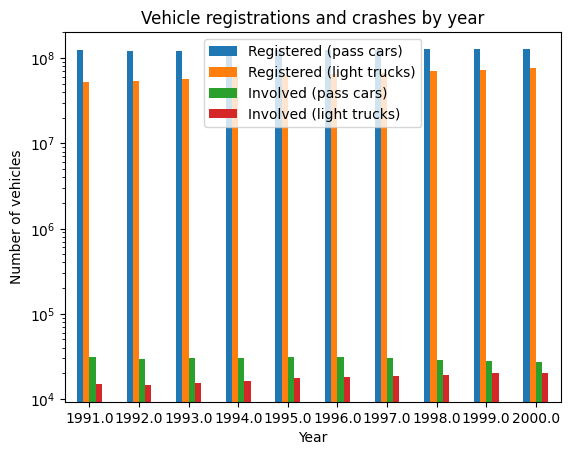

In [35]:
ax = crash_df.plot.bar(x='Year', y=[
    'Registered (pass cars)',
    'Registered (light trucks)', 
    'Involved (pass cars)',
    'Involved (light trucks)'],
    rot=0)
ax.set_yscale('log')
ax.set_ylabel('Number of vehicles')
ax.set_title('Vehicle registrations and crashes by year')

- #### <b>Dataframe (speeding_df) - Fatal rollovers by relative speed, year 2000 </b>

In [19]:
speeding_df = pd.read_csv(r'data\Fatal Rollovers by Relative Speed.csv')
speeding_df = speeding_df.drop('Drivers', axis=1)
speeding_df.head()

,Relative Speed,Passenger Cars,SUVs,Pickup Trucks,Vans
0,Speeding,48,33,36,24
1,Not Speeding,52,67,64,76


- #### <b>Bar chart - Fatal rollovers by relative speed, year 2000</b>

In [43]:
speeding_df = speeding_df.set_index(pd.Index(['Speeding', 'Not Speeding']))
fig = px.bar(speeding_df.drop(columns=['Relative Speed']), barmode='group')
fig.update_layout(title='Fatal rollovers by relative speed for year 2000')
fig.show()

- #### <b>Dataframe (rollover_df2) - Passenger vehicle occupant deaths in rollover crashes by impact point and vehicle type, 2020 </b>

In [21]:
url = 'https://iihs.org/topics/fatality-statistics/detail/passenger-vehicle-occupants?_gl=1'             
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
tables = soup.find_all('table')
rollover_df2 = pd.read_html(str(tables[21]), header=[2])[0]

rollover_df2.drop(rollover_df2.tail(2).index,
        inplace = True)

rollover_df2.columns = ['Point of initial impact', 'Car occupants', '1', 'Pickup occupants', '2', 'SUV occupants', '3', '4', '5']
del rollover_df2["1"]
del rollover_df2["2"]
del rollover_df2["3"]
del rollover_df2["4"]
del rollover_df2["5"]

rollover_df2.head(10)

,Point of initial impact,Car occupants,Pickup occupants,SUV occupants
0,Frontal,1487,768,990
1,Side,496,260,359
2,Rear,117,71,108
3,None,538,539,648
4,Other,350,152,207


- #### <b>Scatter plot - Passenger vehicle occupant deaths in rollover crashes by impact point and vehicle type, 2020</b>

In [44]:
for col in rollover_df2.columns[1:]:
    fig = px.scatter(rollover_df2, x='Point of initial impact', y=col, color='Point of initial impact')
    fig.update_layout(title='Passenger vehicle occupant deaths in rollover crashes by impact point and vehicle type, year 2020')
    fig.update_yaxes(tick0=0)
    fig.show()

- #### <b>Linear Regression Model: Registered vs Involved Passenger Cars</b>

In [23]:
model_cars = LinearRegression()
model_cars.fit(crash_df[['Registered (pass cars)']], crash_df['Involved (pass cars)'])
# print(model_cars.coef_)
# print(model_cars.intercept_)
print(model_cars.predict([[500380030]]))
# model_cars.score(crash_df[['Registered (pass cars)']], crash_df['Involved (pass cars)'])


[-100041.44088893]


c:\Users\Kena.000\.virtualenvs\final-project-patel5r4-oIOlLhYG\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



- #### <b>Plotting the trained model- Linear Regression Model: Registered vs Involved Passenger Cars</b>

c:\Users\Kena.000\.virtualenvs\final-project-patel5r4-oIOlLhYG\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



[[1.20346747e+08]
 [1.22804768e+08]
 [1.25262788e+08]
 [1.27720809e+08]]


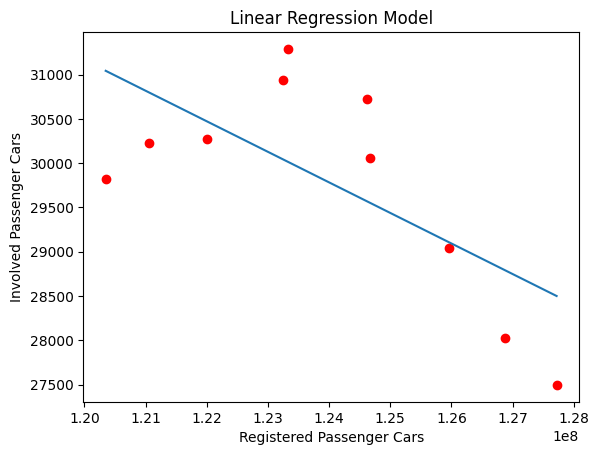

In [24]:
x1 = np.linspace(
    crash_df['Registered (pass cars)'].min(),
    crash_df['Registered (pass cars)'].max(),
    4
)
x1_reshaped = x1.reshape(-1, 1)
print(x1_reshaped)
y1 = model_cars.predict(x1_reshaped)
y1

plt.scatter(crash_df['Registered (pass cars)'], crash_df['Involved (pass cars)'],c='red')
plt.plot(x1, y1)
plt.title('Linear Regression Model')
plt.ylabel('Involved Passenger Cars')
plt.xlabel('Registered Passenger Cars')
plt.show()

- #### <b>Linear Regression Model: Registered vs Involved Light Trucks</b>

In [25]:
model_trucks = LinearRegression()
model_trucks.fit(crash_df[['Registered (light trucks)']], crash_df['Involved (light trucks)'])
# print(model_trucks.coef_)
# print(model_trucks.intercept_)
print(model_trucks.predict([[40000]]))
# model_trucks.score(crash_df[['Registered (light trucks)']], crash_df['Involved (light trucks)'])


[1202.67522234]


c:\Users\Kena.000\.virtualenvs\final-project-patel5r4-oIOlLhYG\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



- #### <b>Plotting the trained model- Linear Regression Model: Registered vs Involved Light Trucks</b>

[[52062064.        ]
 [60105600.33333334]
 [68149136.66666667]
 [76192673.        ]]


c:\Users\Kena.000\.virtualenvs\final-project-patel5r4-oIOlLhYG\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



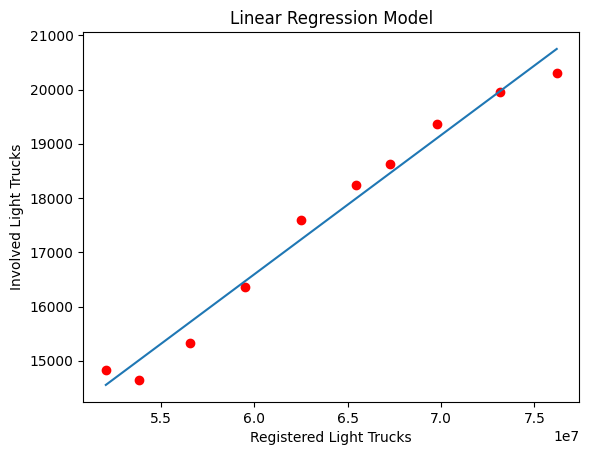

In [28]:
x1 = np.linspace(
    crash_df['Registered (light trucks)'].min(),
    crash_df['Registered (light trucks)'].max(),
    4
)
x1_reshaped = x1.reshape(-1, 1)
print(x1_reshaped)
y1 = model_trucks.predict(x1_reshaped)
y1

plt.scatter(crash_df['Registered (light trucks)'], crash_df['Involved (light trucks)'],c='red')
plt.plot(x1, y1)
plt.title('Linear Regression Model')
plt.ylabel('Involved Light Trucks')
plt.xlabel('Registered Light Trucks')
plt.show()

## Summary

- From the analysis, it looks like cars are more likely to rollover than SUVs and trucks.
- The chances of SUV (and also for vans) rollovers increase when they are not speeding (which sounds odd!). 
- Cars rollover rates are declining.
- In all rollovers, the fatality rates are higher for frontal initial impact point. 
- 
- Also, (forgot to mention earlier), the reason I came up with this topic: personal experience few months back when I almost crashed into the vehicles ahead of mine, not once, but twice on the same day at different locations in NJ! Likely due to overspeeding on completely unfamiliar roads and traffic conditions - though everything was fine (except for my vehicle's sensors screaming at me!). 

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

1. National Highway Traffic Safety Administration (NHTSA)
2. Insurance Institute for Highway Safety (IIHS)

In [45]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 15782 bytes to source.py
